In [23]:
import networkx as nx
import matplotlib.pyplot as plt

In [24]:
def show_network(G, title="Réseau Sémantique",activations=None):
    plt.figure(figsize=(12, 10))

    # --- Nouvelle palette et style moderne ---
    node_color_default = "#80c4ff"    # bleu pastel
    edge_color_default = "#555555"    # gris foncé
    label_color = "#1f1f1f"           # gris/noir lisible

    # Position des nœuds (même algo mais plus serré)
    pos = nx.spring_layout(G, k=1.5, iterations=80, seed=42)

    # Taille et couleur des nœuds (activation ou style simple)
    if activations:
        node_sizes = [2800 + 2000 * activations.get(n, 0) for n in G.nodes()]
        node_colors = [activations.get(n, 0.2) for n in G.nodes()]
        cmap = plt.cm.Blues
    else:
        node_sizes = 3000
        node_colors = node_color_default
        cmap = None

    # --- Nœuds arrondis avec contour plus fin ---
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        node_size=node_sizes,
        edgecolors="#2c2c2c",
        linewidths=1.5,
        alpha=0.95,
        cmap=cmap
    )

    # --- Labels des nœuds (police plus lisible) ---
    nx.draw_networkx_labels(
        G, pos,
        font_size=12,
        font_weight="semibold",
        font_color=label_color
    )

    # --- Arêtes plus douces avec une légère courbure ---
    nx.draw_networkx_edges(
        G, pos,
        edge_color=edge_color_default,
        arrows=True,
        arrowsize=18,
        arrowstyle="-|>",
        connectionstyle="arc3,rad=0.07",
        width=1.8,
        alpha=0.85
    )

    # --- Labels des arêtes dans un style plus propre ---
    edge_labels = nx.get_edge_attributes(G, 'relation')
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_color="#AA0000",
        font_size=10,
        bbox=dict(
            boxstyle="round,pad=0.3",
            facecolor="white",
            edgecolor="#CCCCCC",
            alpha=0.9
        )
    )

    # --- Titre ---
    plt.title(title, fontsize=17, fontweight="bold", pad=15)

    plt.axis("off")
    plt.tight_layout()
    plt.show()


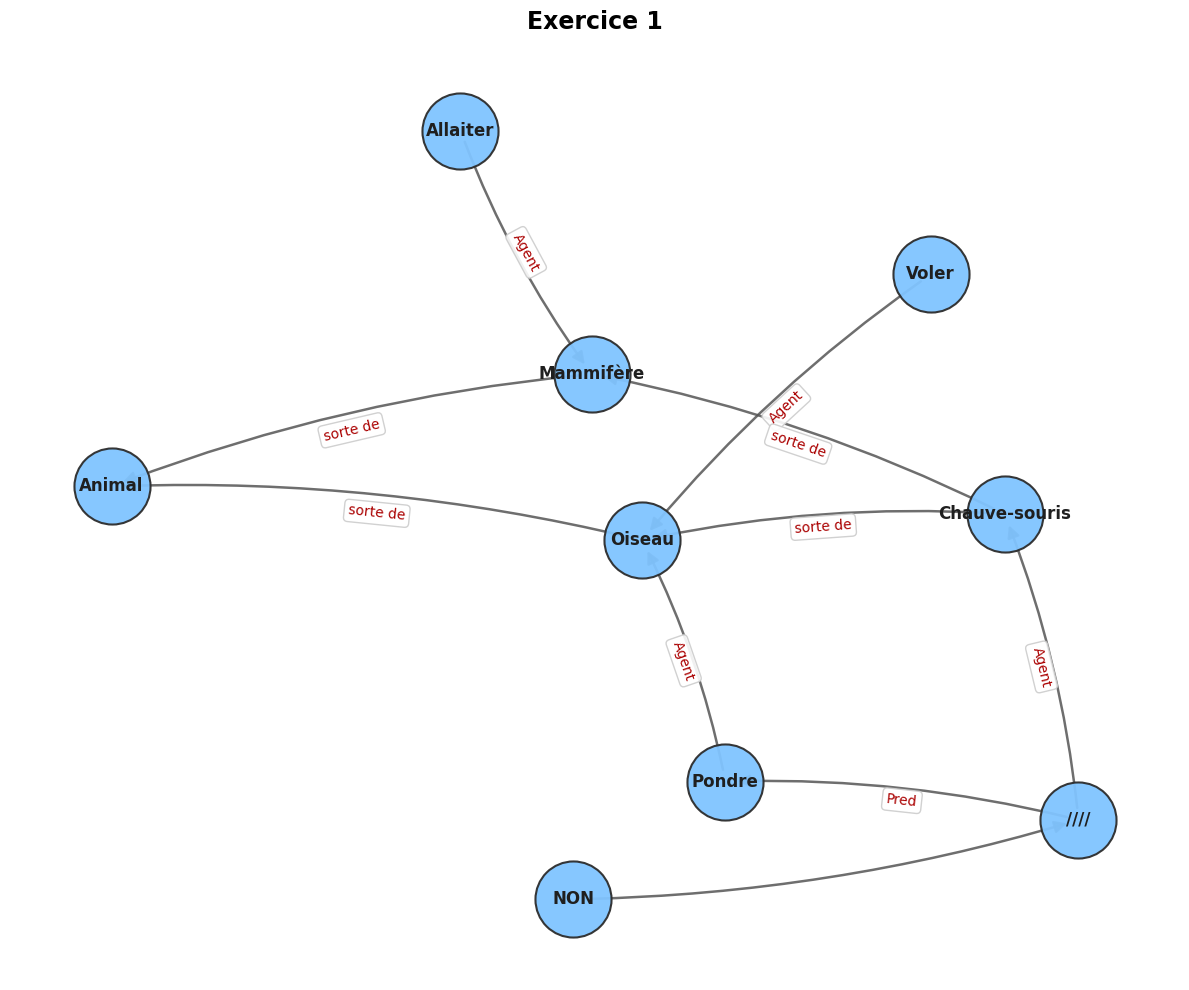

In [25]:
G1 = nx.DiGraph()
edges1 = [
    ("Voler", "Oiseau", "Agent"),
    ("Pondre", "Oiseau", "Agent"),
    ("Oiseau", "Animal", "sorte de"),
    ("Mammifère", "Animal", "sorte de"),
    ("Allaiter", "Mammifère", "Agent"),
    ("Chauve-souris", "Mammifère", "sorte de"),
    ("Chauve-souris", "Oiseau", "sorte de"),
    ("////", "Chauve-souris", "Agent"),
    ("////", "Pondre", "Pred"),
    ("NON", "////", ""),

]
for s, d, r in edges1:
    G1.add_edge(s, d, relation=r)

show_network(G1,"Exercice 1")


Exercice 2



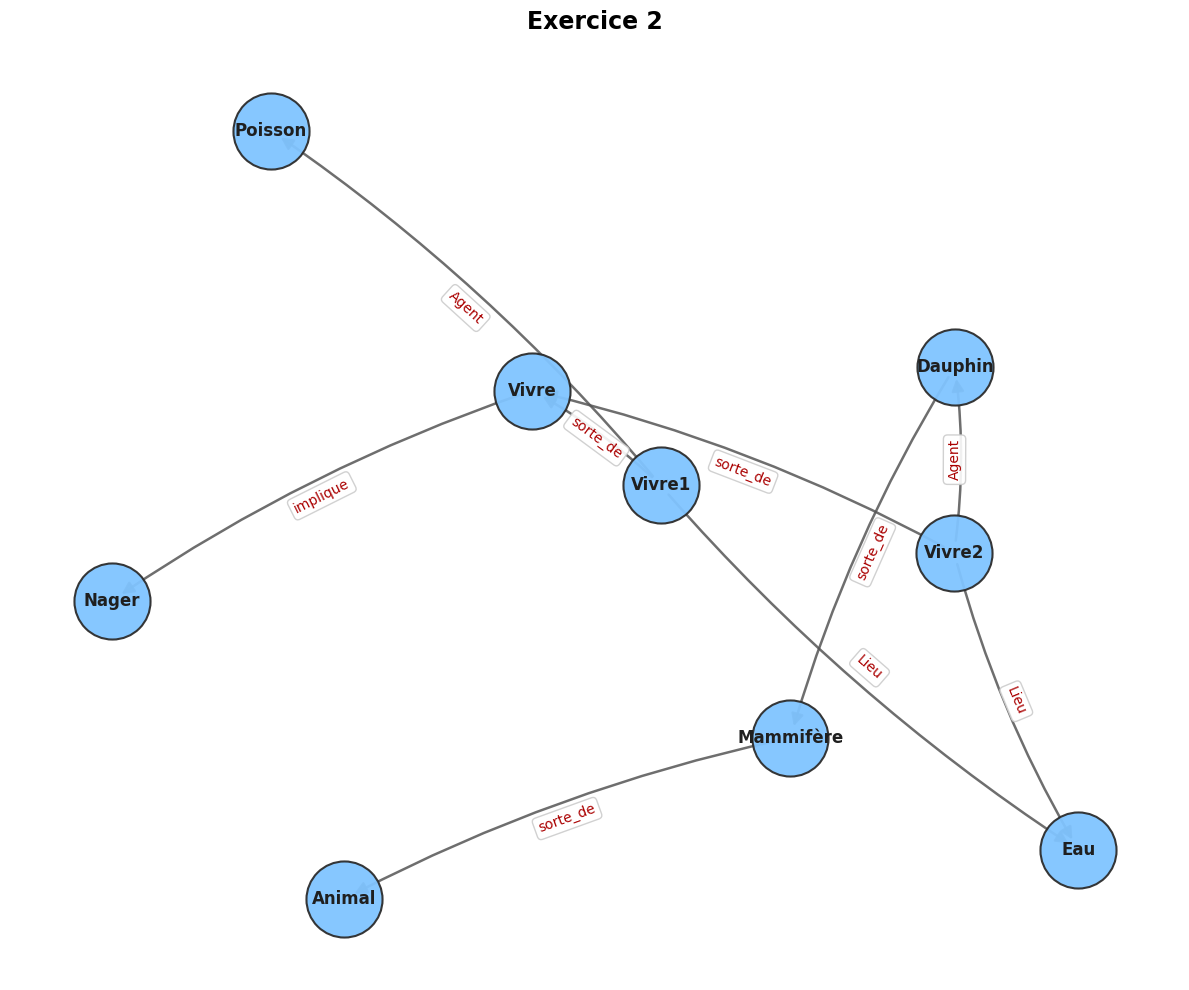

In [26]:
G2 = nx.DiGraph()
edges2 = [
    ("Dauphin", "Mammifère", "sorte_de"),
    ("Mammifère", "Animal", "sorte_de"),
    
    ("Vivre1", "Vivre", "sorte_de"),
    ("Vivre1", "Poisson", "Agent"),
    ("Vivre1", "Eau", "Lieu"),
    
    ("Vivre2", "Vivre", "sorte_de"),
    ("Vivre2", "Dauphin", "Agent"),
    ("Vivre2", "Eau", "Lieu"),
    
    ("Vivre", "Nager", "implique")
]
for s, d, r in edges2:
    G2.add_edge(s, d, relation=r)

print("Exercice 2\n")
show_network(G2, "Exercice 2")


Exercice 3



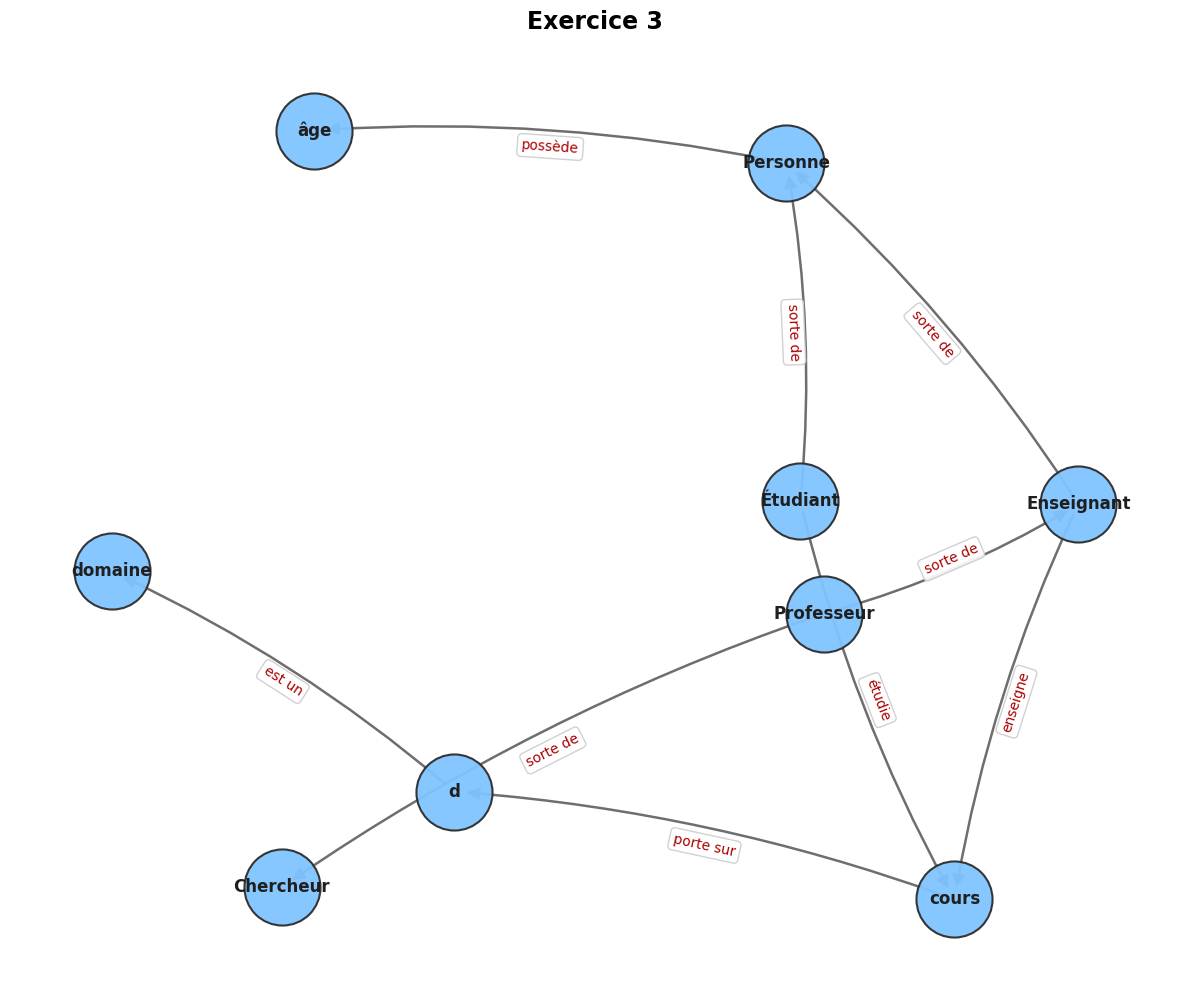

Contrainte : domaine_enseigné = domaine_étudié


In [27]:
G3 = nx.DiGraph()
edges3 = [
    ("Professeur", "Enseignant", "sorte de"),
    ("Professeur", "Chercheur", "sorte de"),
    ("Étudiant", "Personne", "sorte de"),
    ("Enseignant", "Personne", "sorte de"),
    ("Personne", "âge", "possède"),
    ("Étudiant", "cours", "étudie"),
    ("Enseignant", "cours", "enseigne"),
    ("d", "domaine", "est un"),
    ("cours", "d", "porte sur"),
]
for s, d, r in edges3:
    G3.add_edge(s, d, relation=r)

print("Exercice 3\n")
show_network(G3, "Exercice 3")
print('Contrainte : domaine_enseigné = domaine_étudié')

Exercice 4 :
Chien 1.0
Animal 0.5
Os 0.5
ÊtreVivant 0.25
Nourriture 0.25



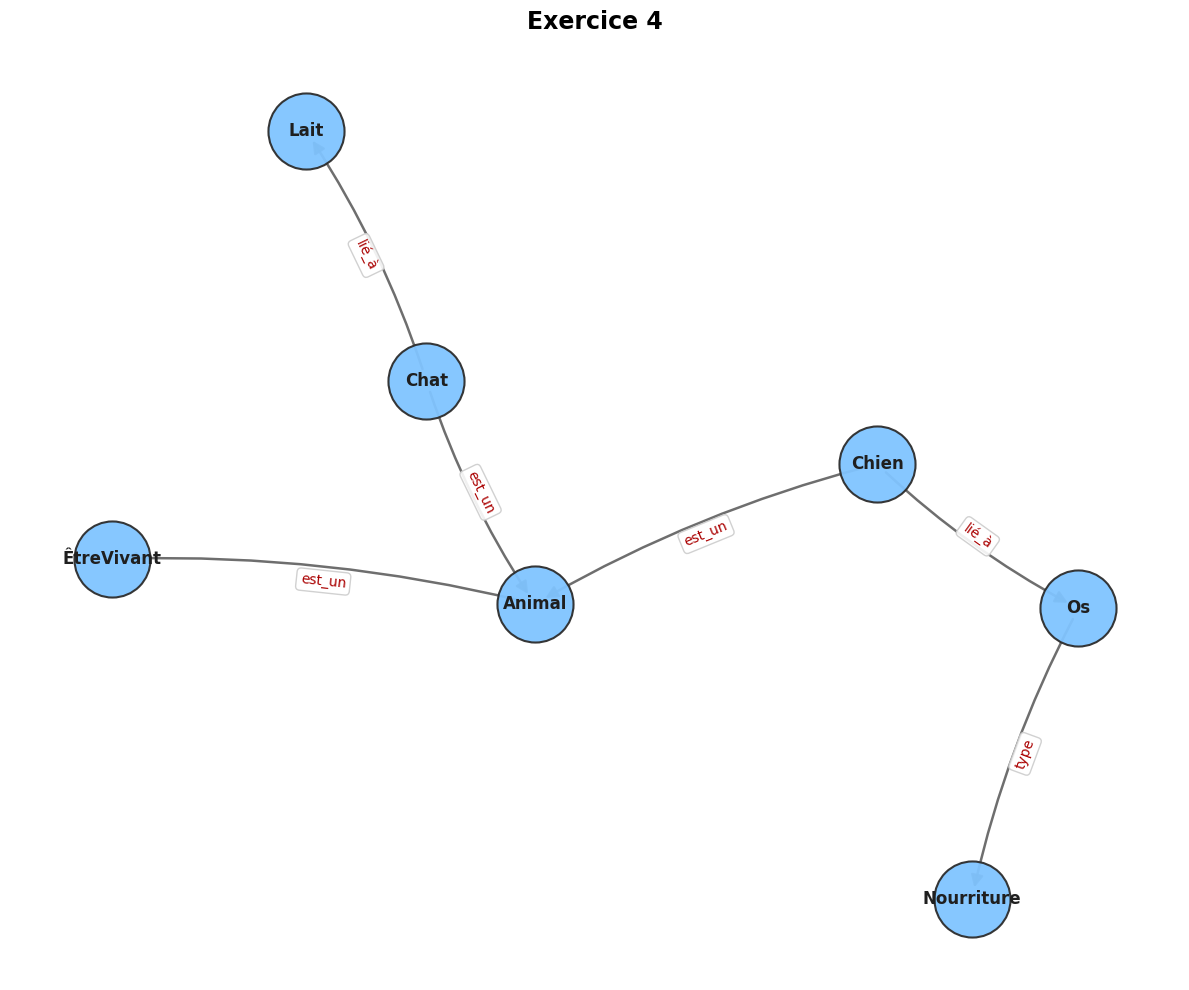

In [28]:
G4 = nx.DiGraph()
edges4 = [
    ("Chien", "Animal", "est_un"),
    ("Chat", "Animal", "est_un"),
    ("Animal", "ÊtreVivant", "est_un"),
    ("Chien", "Os", "lié_à"),
    ("Chat", "Lait", "lié_à"),
    ("Os", "Nourriture", "type")
]
for s, d, r in edges4:
    G4.add_edge(s, d, relation=r)

activation = propagation_activation(G4, "Chien", level=3, decay=0.5)
print("Exercice 4 :")
for n, v in activation.items():
    print(n, v)
print()
show_network(G4, "Exercice 4")

Exercice 5 :


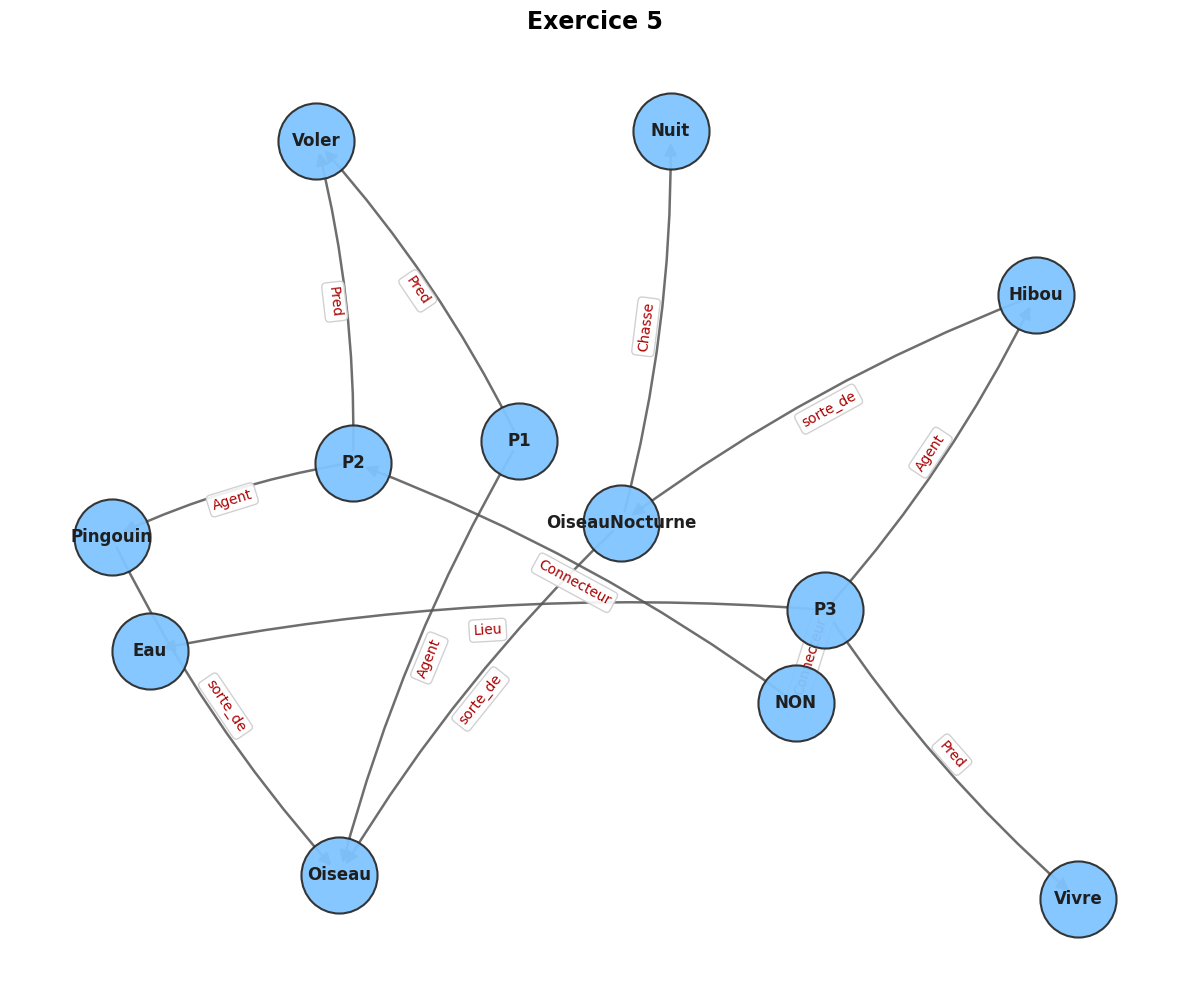

In [29]:
G5 = nx.DiGraph()
edges5 = edges5 = [
    ("Hibou", "OiseauNocturne", "sorte_de"),
    ("OiseauNocturne", "Oiseau", "sorte_de"),
    ("Pingouin", "Oiseau", "sorte_de"),
    
    ("P1", "Voler", "Pred"),
    ("P1", "Oiseau", "Agent"),
    
    ("NON", "P2", "Connecteur"),      
    ("P2", "Voler", "Pred"),
    ("P2", "Pingouin", "Agent"),
    
    ("OiseauNocturne", "Nuit", "Chasse"),
    
    ("NON", "P3", "Connecteur"),      
    ("P3", "Vivre", "Pred"),
    ("P3", "Hibou", "Agent"),
    ("P3", "Eau", "Lieu"),
    
]
for s, d, r in edges5:
    G5.add_edge(s, d, relation=r)

print("Exercice 5 :")
show_network(G5, "Exercice 5")

Exercice 6 :


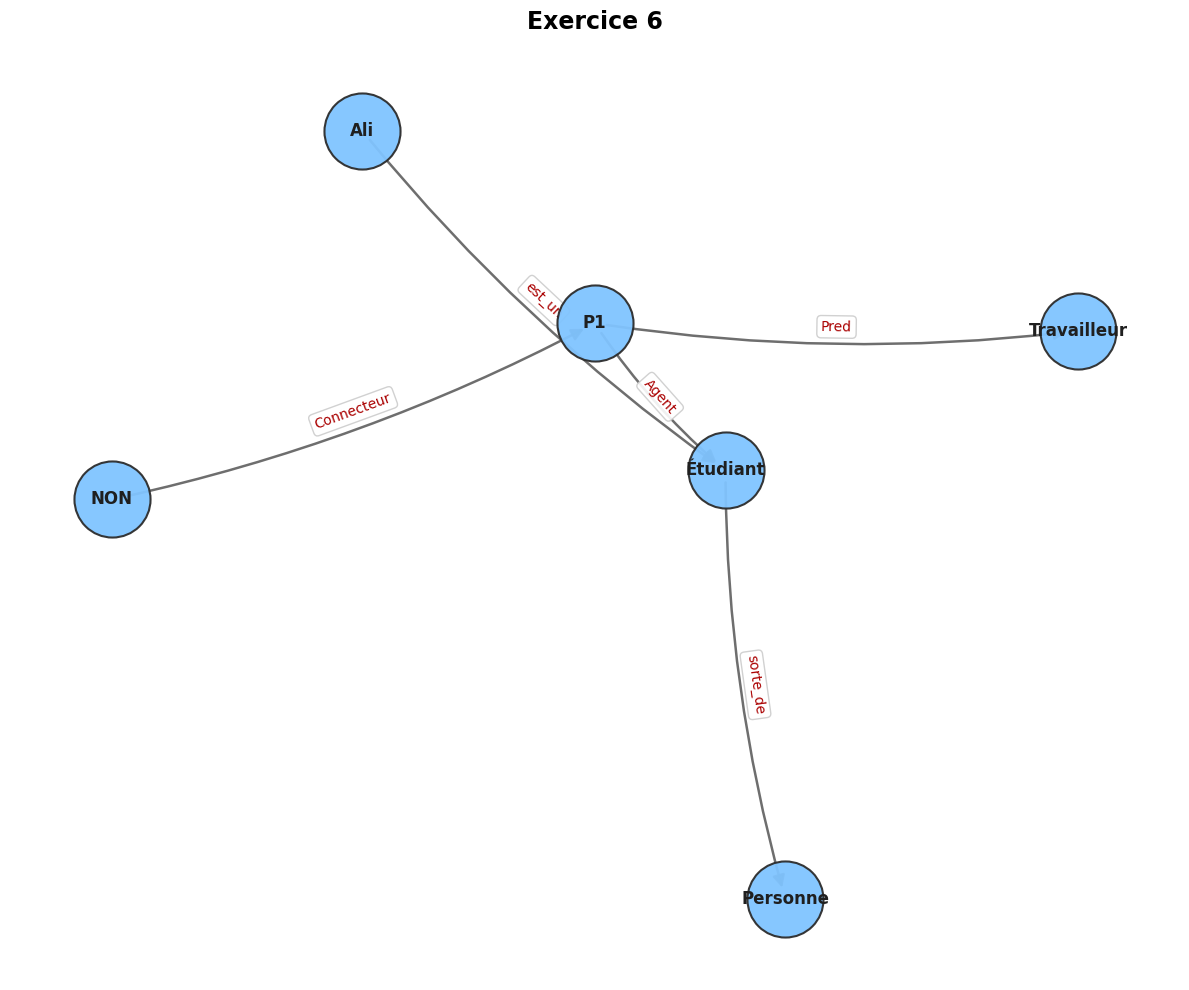

In [30]:
G6 = nx.DiGraph()
edges6 = [
    ("Étudiant", "Personne", "sorte_de"),
    
    ("NON", "P1", "Connecteur"),
    ("P1", "Travailleur", "Pred"),
    ("P1", "Étudiant", "Agent"),
    
    ("Ali", "Étudiant", "est_un"),
]
for s, d, r in edges6:
    G6.add_edge(s, d, relation=r)

print("Exercice 6 :")
show_network(G6, "Exercice 6")

Exercice 7:


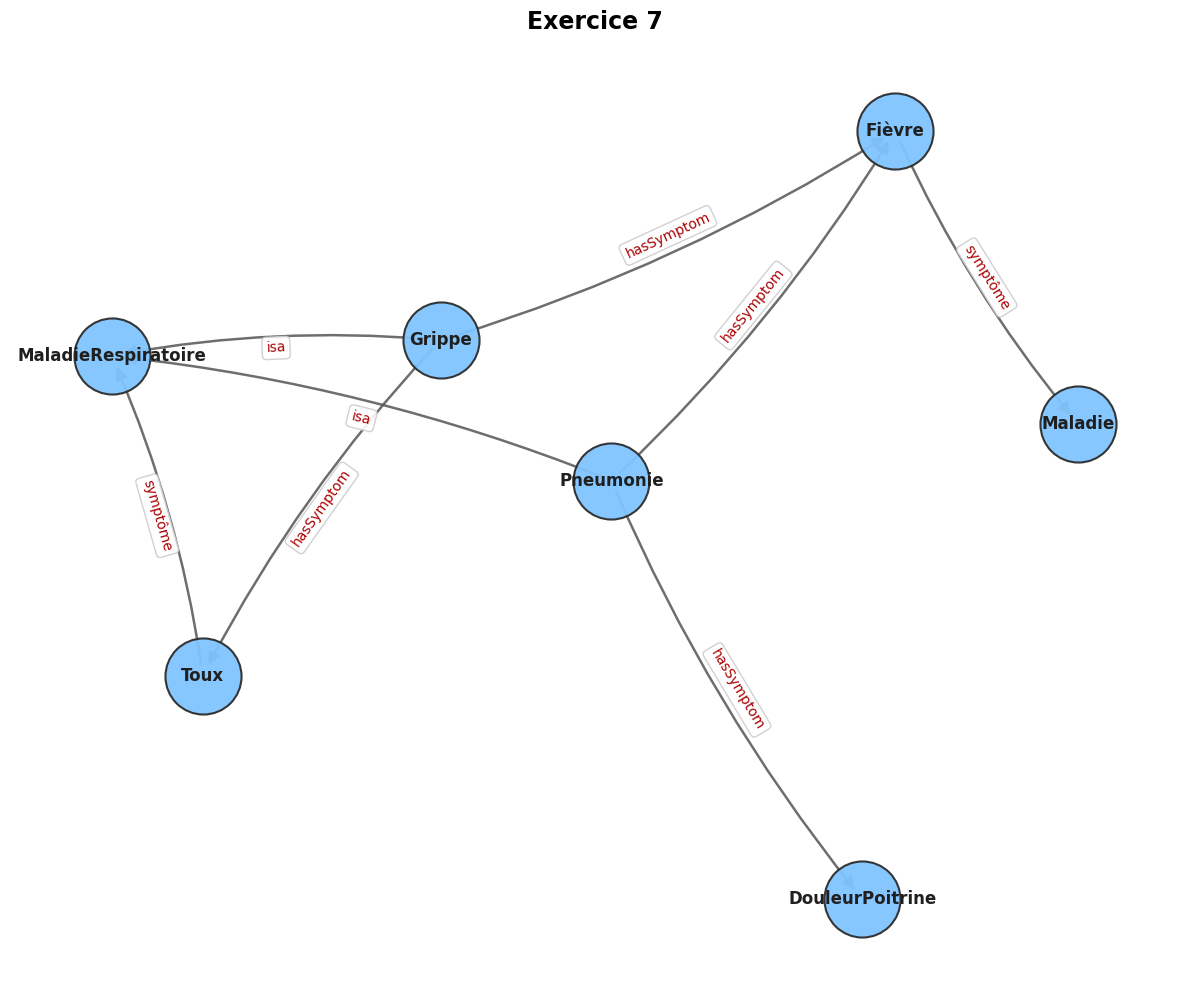

In [31]:
G7 = nx.DiGraph()
edges7 = [
    ("Fièvre", "Maladie", "symptôme"),
    ("Toux", "MaladieRespiratoire", "symptôme"),
    ("Grippe", "MaladieRespiratoire", "isa"),
    ("Grippe", "Fièvre", "hasSymptom"),
    ("Grippe", "Toux", "hasSymptom"),
    ("Pneumonie", "MaladieRespiratoire", "isa"),
    ("Pneumonie", "Fièvre", "hasSymptom"),
    ("Pneumonie", "DouleurPoitrine", "hasSymptom")
]
for s, d, r in edges7:
    G7.add_edge(s, d, relation=r)

symptomes_patient = {"Fièvre", "Toux"}
maladies_possibles = []
if symptomes_patient.issubset({"Fièvre", "Toux"}):
    maladies_possibles.append("Grippe")
print("Exercice 7:")
show_network(G7, "Exercice 7")


La maladie possible est la Grippe car elle possède exactement les deux symptômes observés (Fièvre et Toux). La Pneumonie n'est pas possible car elle n'a pas le symptôme Toux.